In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Outliers
Oulier is a data point in data set which is distant from other point. This is extremely high or extremely low point in data set. And the point which lies outside the overall distribution of the data set.
# Reasons
1 Measurement Errors<br>
2 Variability in the data<br>
3 Incomolete Data<br>
   
# Impacts of outliers
1 It leads to various problems during our statistical analysis<br>
2 It may cause a significant impact on the mean and the standard deviation<br>
3 It may show impact on the accuracy of predictive models<br>
 
# Various ways of findig the ouliers
 Visual observation<br>
1 Box Plot<br>
2 Scatter plot<br>

By Statistical measures<br>
1 Z-Score<br>
2 IQR (InterquartileRange)<br>

By Clustering methods<br>
1 K means clustering<br>
2 DBSCAN <br>


In [2]:
df= pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


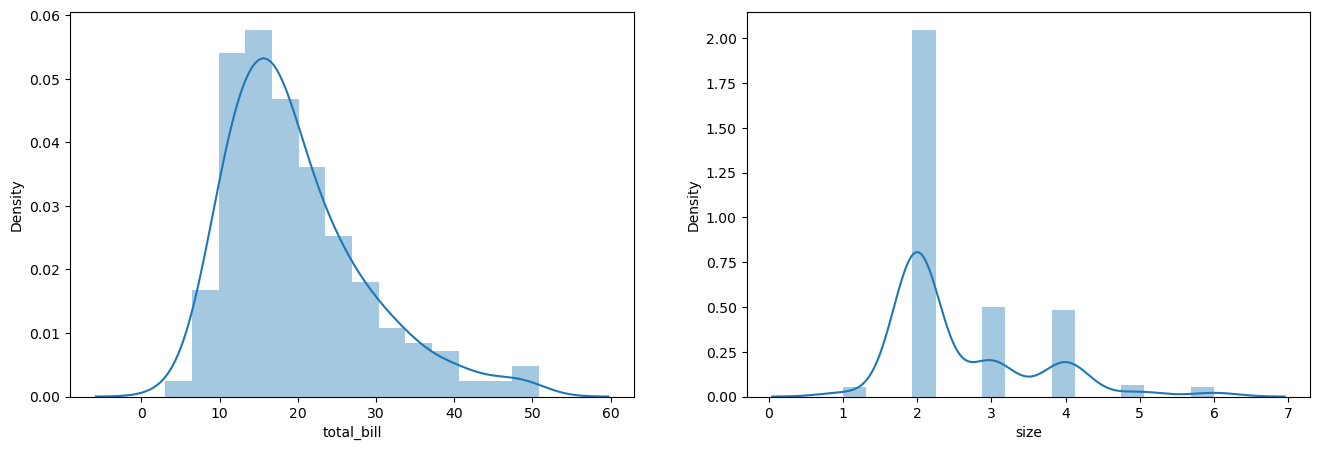

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['total_bill'])

plt.subplot(1,2,2)
sns.distplot(df['size'])

plt.show()

<Axes: >

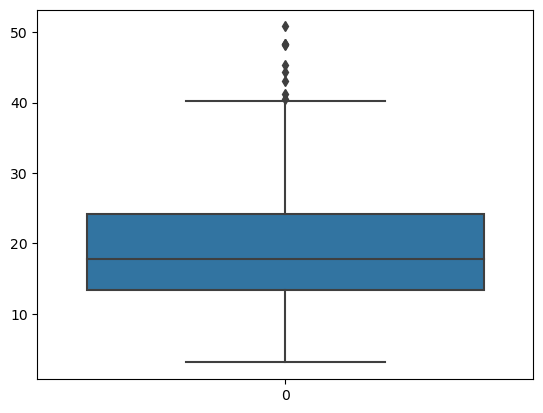

In [6]:
sns.boxplot(df['total_bill'])

In [7]:
percentile25 = df['total_bill'].quantile(0.25)
percentile75 = df['total_bill'].quantile(0.75)

In [8]:
percentile75

24.127499999999998

In [9]:
iqr = percentile75 - percentile25

In [10]:
iqr

10.779999999999998

In [11]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [12]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 40.29749999999999
Lower limit -2.8224999999999945


In [13]:
df[df['total_bill'] > upper_limit]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [14]:
new_df=df[df['total_bill'] < lower_limit]

In [15]:
new_df.shape

(0, 7)

# SKEWNESS
 This skew() fucntion is used to compute the skewness of distribution.<br>
 Skewness is a measure of the asymmetry of a probability distribution.<br>
 
 Skewness = 0 The distribution is perfectly symmetrical.<br>
Skewness > 0 The distribution is skewed to the right i.e positively skewed<br>
Skewness < 0 The distribution is skewed to the left i.e negatively skewed<br>

In [16]:
df['total_bill'].skew()

1.1332130376158205

In [17]:
df['size'].skew()

1.4478815386834785

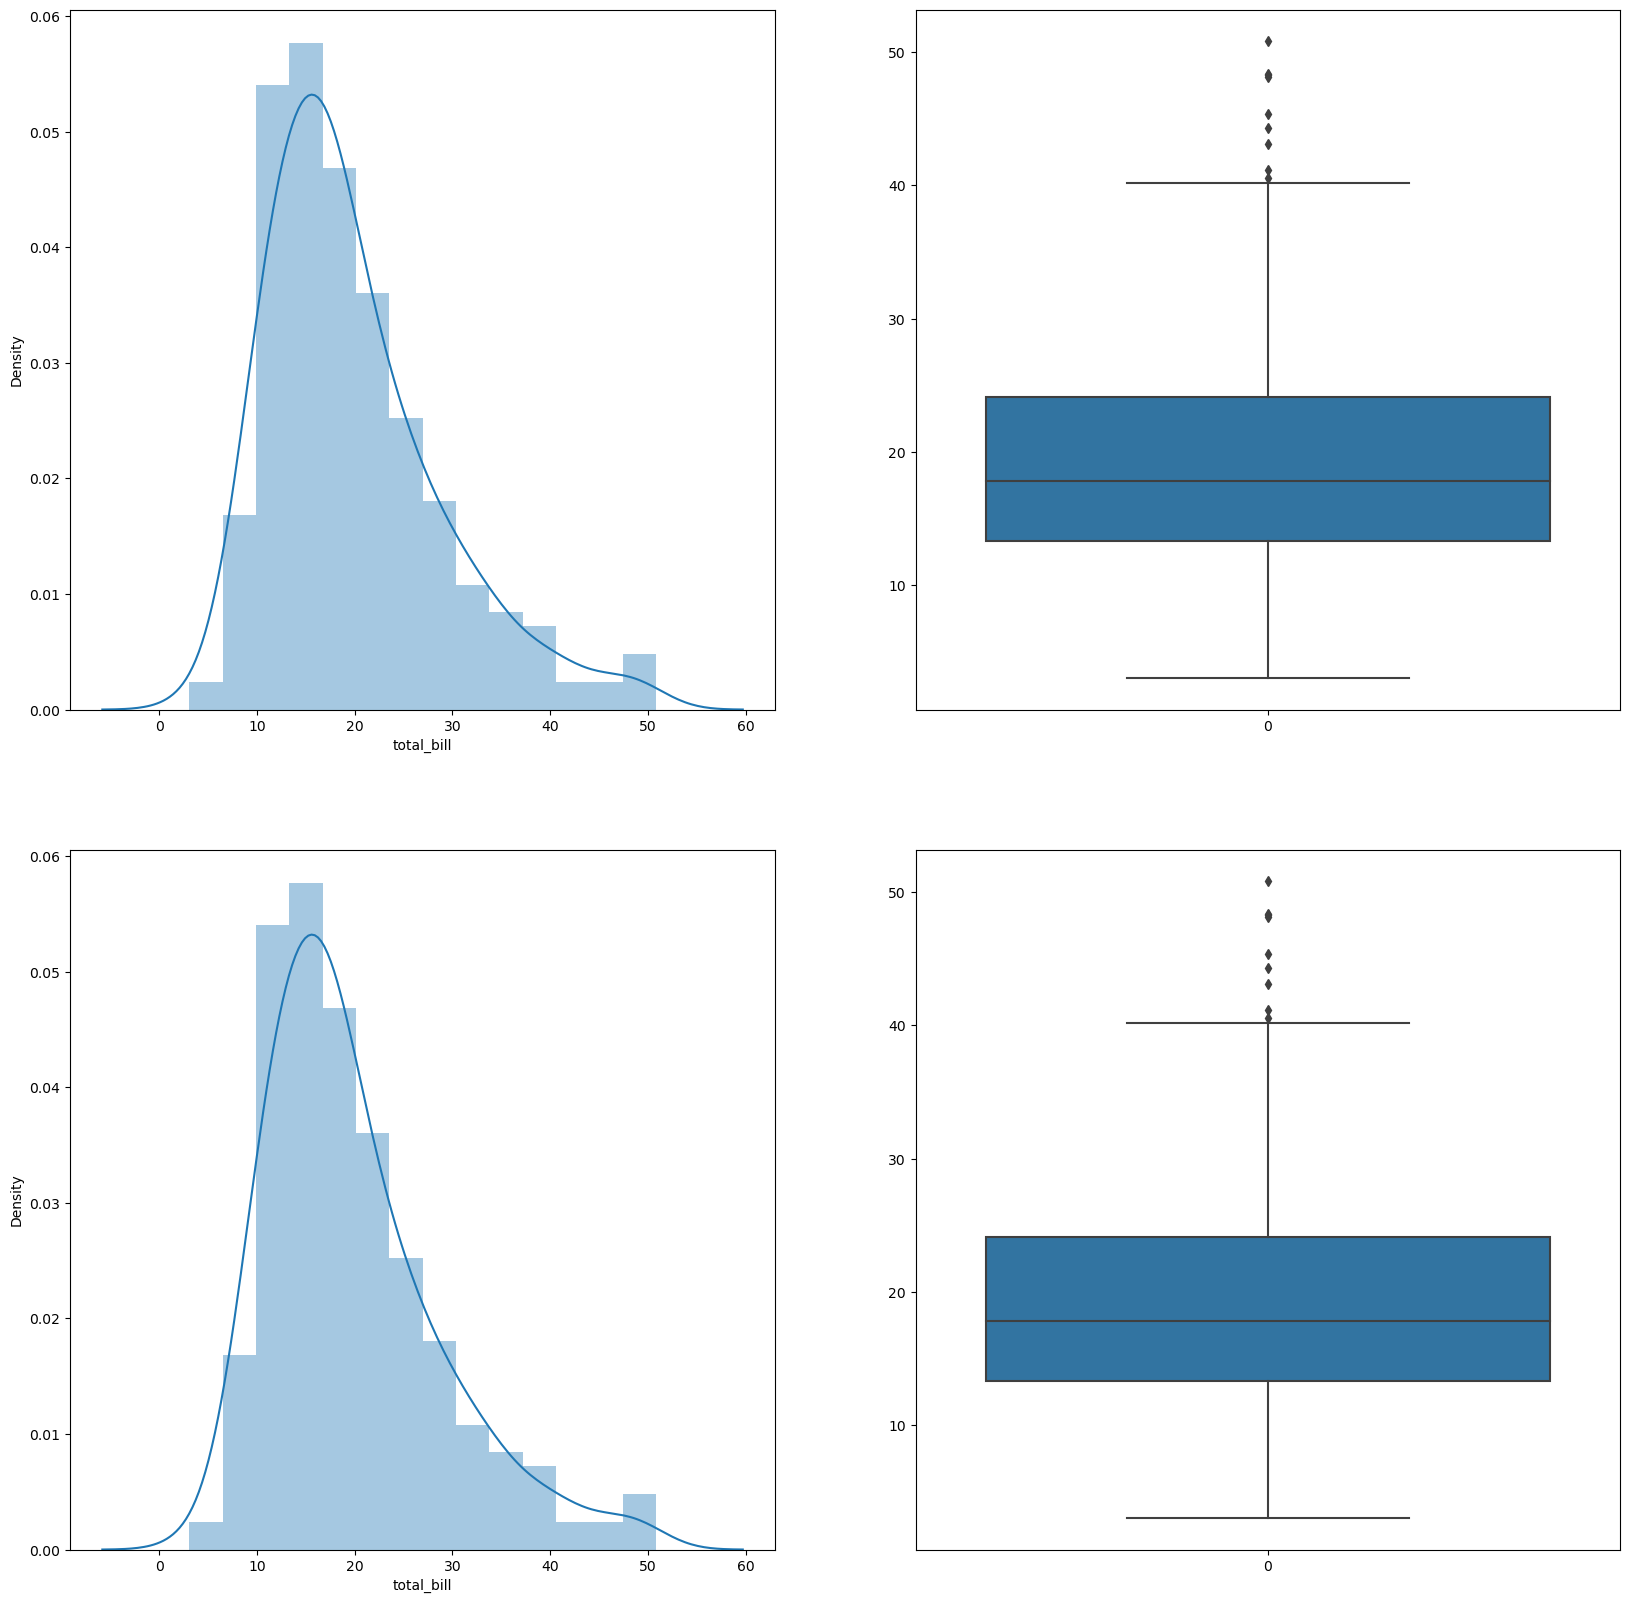

In [21]:

new_df_cap = df.copy()

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.distplot(df['total_bill'])

plt.subplot(2, 2, 2)
sns.boxplot(df['total_bill'])

plt.subplot(2, 2, 3)
sns.distplot(new_df_cap['total_bill'])

plt.subplot(2, 2, 4)
sns.boxplot(new_df_cap['total_bill'])

plt.show()


#  Detecting Using Z-Score 

By Using Z score
Formula for Z score = (Value — Mean)/Standard Deviation

z = (X — μ) / σ

In [22]:
dataset= [11,10,12,14,12,15,14,13,52,15,16,12,14,17,19,10, 10,13,12,45,14,12,10,12,11,14,31,13,15,10,15,12,10,14,13,15,10]

In [23]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


In [24]:
outlier_pt=detect_outliers(dataset)

In [25]:
outlier_pt

[52, 45]

# This is a basic information about outliers and it's detection.<br>

# Hope it is useful
#                         Thank you